# Data Exploration for Kaggle's Titanic Problem

This notebook explores the training dataset for Kaggle's introductory Titanic problem.

_Information provided in the assignment [sic]:_

#### Data Dictionary

Variable | Definition | Key
-------- | ---------- | ---
survival | Survival | 0 = No, 1 = Yes
pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
sex | Sex |
Age | Age in years |
sibsp | # of siblings / spouses aboard the Titanic |
parch | # of parents / children aboard the Titanic |
ticket | Ticket number |
fare | Passenger fare |
cabin | Cabin number |
embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

### Structure

In [2]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Ticket Class

Check `Pclass` for consistency.

In [4]:
print("Unique entries: {}".format(data.Pclass.unique()))
print("Empty values: {}".format(sum(data.Pclass.isnull())))

Unique entries: [3 1 2]
Empty values: 0


Visualize passenger amount and survivability by class.

,1st,2nd,3rd
0,80,97,372
1,136,87,119


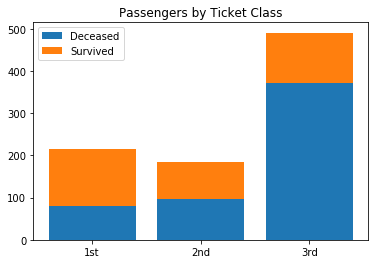

In [5]:
class_1 = data.Survived[data.Pclass == 1].value_counts().sort_index()
class_2 = data.Survived[data.Pclass == 2].value_counts().sort_index()
class_3 = data.Survived[data.Pclass == 3].value_counts().sort_index()

table = pd.concat([class_1, class_2, class_3], axis=1, keys=['1st', '2nd', '3rd'])
display(table)

i = np.arange(len(table.keys()))
bar_1 = plt.bar(i, table.iloc[0])
bar_2 = plt.bar(i, table.iloc[1], bottom=table.iloc[0])
plt.xticks(i, table.keys())
plt.legend((bar_1[0], bar_2[0]), ('Deceased', 'Survived'))
plt.title('Passengers by Ticket Class');

### Name

Check `Name` for empty values.

In [6]:
print("Number of unique / total entries: {}/{}".format(len(data.Name.unique()), len(data)))

Number of unique / total entries: 891/891


`Name` values include titles. Extract and examine these.

In [7]:
titles = data.Name.apply(lambda x: re.search(", (.*?)\.", x).group(1))
titles.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Sir               1
Lady              1
Capt              1
Mme               1
the Countess      1
Jonkheer          1
Ms                1
Name: Name, dtype: int64

### Ticket number

Explore the "label" prefixed to some `Ticket` values:

In [8]:
labels = []
for row in data['Ticket'].str.split(" "):
    if len(row) > 1:
        labels.append(row[0])
labels = pd.Series(labels)
labels.value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
CA.            8
SOTON/O.Q.     8
SOTON/OQ       7
A/5.           7
STON/O2.       6
CA             6
SC/PARIS       5
S.O.C.         5
C              5
F.C.C.         5
SC/Paris       4
A/4            3
PP             3
A/4.           3
S.O./P.P.      3
SC/AH          3
SOTON/O2       2
S.C./PARIS     2
P/PP           2
WE/P           2
A./5.          2
A.5.           2
F.C.           1
S.P.           1
W/C            1
S.O.P.         1
SCO/W          1
S.W./PP        1
C.A./SOTON     1
SC             1
A/S            1
A4.            1
SW/PP          1
S.C./A.4.      1
SO/C           1
W.E.P.         1
Fa             1
dtype: int64

### Cabin

`Cabin` values appear to consist of deck and cabin number.

In [20]:
cabin_values = data.Cabin[pd.notnull]
print("Some values: {}".format(cabin_values.unique()[0:10]))
print("Number of (unique) values: ({}) {}".format(len(cabin_values.unique()), cabin_values.count()))

Some values: ['C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33']
Number of (unique) values: (147) 204


The data for `Cabin` is quite sparse with 204 values in 891 entries. Some passengers would appear to share cabins since there are duplicate values. Some have multiple cabins under their name.

Split into separate features for deck and cabin number:

In [47]:
def split_cabin(cabin):
    if pd.notnull(cabin):
        match = re.search("(\w{1})(\d{1,3})", cabin)
        if match is not None:
            return match.group(1), match.group(2)
    return None, None

df = pd.DataFrame(data.Cabin.apply(split_cabin).tolist(), columns=['Deck', 'CabinNo'])

In [48]:
df.Deck.unique()

array([None, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

We see that `Deck` includes only `None`'s and valid deck symbols. These will be easy to convert to integers.